# Inverted Pendulum
### Lehner White

In [1]:
from __future__ import division
import numpy as np
from scipy.optimize import root
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are
from matplotlib import pyplot as plt
import seaborn

## Problem 1:

In [2]:
def linearized_init(M, m, l, q1, q2, q3, q4, r):
    '''
    Parameters:
    ----------
    M, m: floats
        masses of the rickshaw and the present
    l : float
        length of the rod
    q1, q2, q3, q4, r : floats
        relative weights of the position and velocity of the rickshaw, the
        angular displacement theta and the change in theta, and the control

    Return
    -------
    A : ndarray of shape (4,4)
    B : ndarray of shape (4,1)
    Q : ndarray of shape (4,4)
    R : ndarray of shape (1,1)
    '''
    g = 9.8
    A = np.array([[0, 1, 0, 0],
                  [0, 0, (m*g)/M, 0],
                  [0, 0, 0, 1],
                  [0, 0, (g/(M*l)) * (M + m), 0]])
    B = np.array([[0], [1/M], [0], [1/(M*l)]])
    Q = np.diag([q1,q2,q3,q4])
    R= np.array([r]).reshape((1,1))
    return A, B, Q, R

## Problem 2:

In [3]:
def find_P(A, B, Q, R):
    '''
    Parameters:
    ----------
    A, Q : ndarrays of shape (4,4)
    B : ndarray of shape (4,1)
    R : ndarray of shape (1,1)
    Returns
    -------
    P : the matrix solution of the Riccati equation
    '''
    def f(P):
        P = np.reshape(P, (4,4))
        eq = P.dot(A) + A.T.dot(P) + Q - P.dot(B).dot(np.linalg.inv(R)).dot(B.T).dot(P)
        return np.reshape(eq, (16))
    
    P0 = np.ones(16) * 0.1
    sol = root(f, P0)
    return np.reshape(sol.x, (4,4))

In [4]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 5.

A, B, Q, R = linearized_init(M, m, l, q1, q2, q3, q4, r)

P = find_P(A, B, Q, R)
print np.round(np.linalg.eig(A - B.dot(np.linalg.inv(R).dot(B.T.dot(P))))[0], 2)

[-1.73+0.j   -0.06+0.06j -0.06-0.06j  1.73+0.j  ]


Yes, we do have a single positive eigenvlaue suggesting that the system is unstable which tells us that z will not approach 0.

## Problem 3:

In [5]:
def rickshaw(tv, X0, A, B, Q, R, P):
    """
    Parameters:
    ----------
    tv : ndarray of time values, with shape (n+1,)
    X0 : Initial conditions on state variables
    A, Q: ndarrays of shape (4,4)
    B : ndarray of shape (4,1)
    R : ndarray of shape (1,1)
    P : ndarray of shape (4,4)
    Returns
    -------
    Z : ndarray of shape (n+1,4), the state vector at each time
    U : ndarray of shape (n+1,), the control values
    """
    f = lambda x, t : (A - B.dot(np.linalg.inv(R).dot(B.T.dot(P)))).dot(x)
    return odeint(f, X0, tv)

## Problem 4:

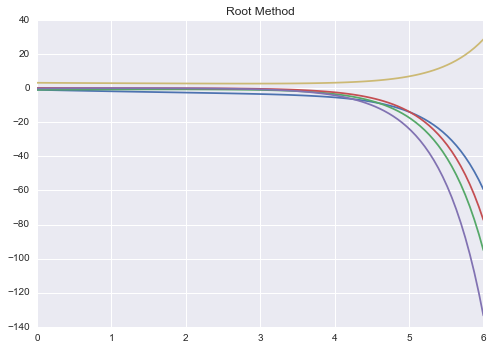

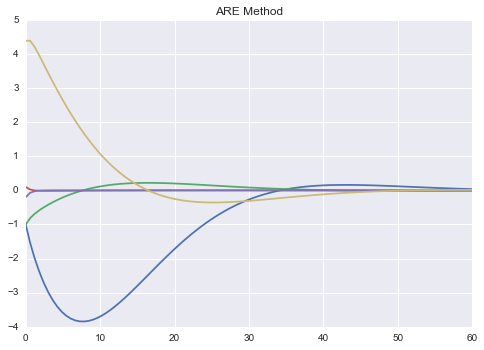

In [6]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 5.
tfs = [6,60]
X0 = np.array([-1, -1, .1, -.2])

A, B, Q, R = linearized_init(M, m, l, q1, q2, q3, q4, r)
P = find_P(A, B, Q, R)
tv = np.linspace(0, tfs[0], 100)
X = rickshaw(tv, X0, A, B, Q, R, P)
U = -1 * (np.linalg.inv(R).dot(B.T).dot(P))
U = U.dot(X.T)

plt.plot(tv, X)
plt.plot(tv, U.T)
plt.title('Root Method')
plt.show()

P = solve_continuous_are(A, B, Q, R)
tv = np.linspace(0, tfs[1], 100)
X = rickshaw(tv, X0, A, B, Q, R, P)
U = -1 * (np.linalg.inv(R).dot(B.T).dot(P))
U = U.dot(X.T)

plt.plot(tv, X)
plt.plot(tv, U.T)
plt.title('ARE Method')
plt.show()


## Problem 5:

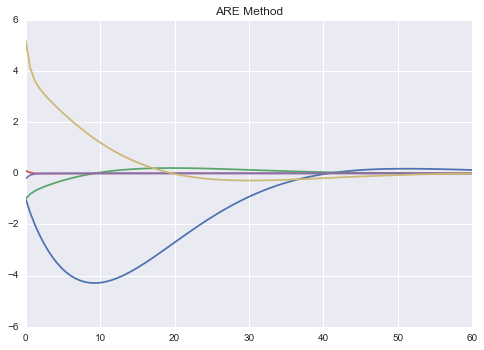

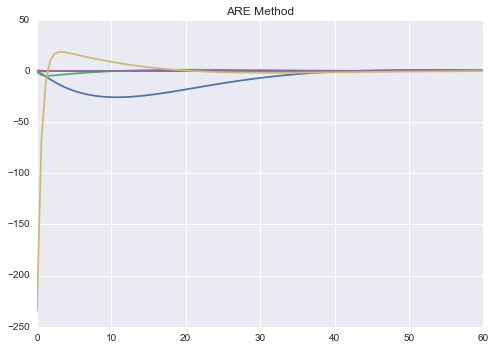

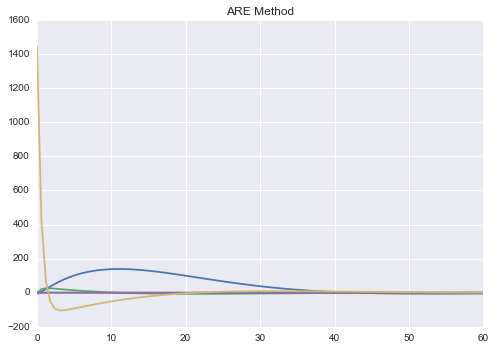

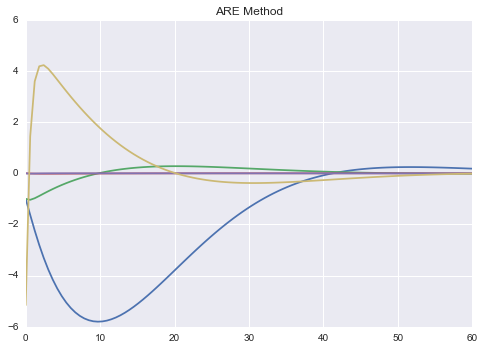

In [7]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf = 60

X_list = [np.array([-1, -1, .1, -.2]),
         np.array([-1, -1, .5, -.2]),
         np.array([-1, -1, .5, -5]),
         np.array([-1, -1, .001, -.001])]

for X0 in X_list:
    A, B, Q, R = linearized_init(M, m, l, q1, q2, q3, q4, r)
    P = solve_continuous_are(A, B, Q, R)
    tv = np.linspace(0, tf, 100)
    X = rickshaw(tv, X0, A, B, Q, R, P)
    U = -1 * (np.linalg.inv(R).dot(B.T).dot(P))
    U = U.dot(X.T)

    plt.plot(tv, X)
    plt.plot(tv, U.T)
    plt.title('ARE Method')
    plt.show()

Smaller theta values mean that there is a smaller angular momentum and makes the system much easier to control. 